<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2025/blob/main/Module_6/31_Structured_Gaussian_Proceses_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian processes

The notebook for the University of Tennessee, Knoxville, Department of Materials Science and Engineering Spring 2025 course, MSE510.
- Instructor Sergei V. Kalinin
- Examples adapted from: https://livebook.manning.com/book/bayesian-optimization-in-action/chapter-1/  
- Several examples are based on ChatGPT

In [ ]:
!pip install gpytorch
!pip install botorch

# Linear regression in Torch

Learned parameters: m = 2.7431, b = -0.3280


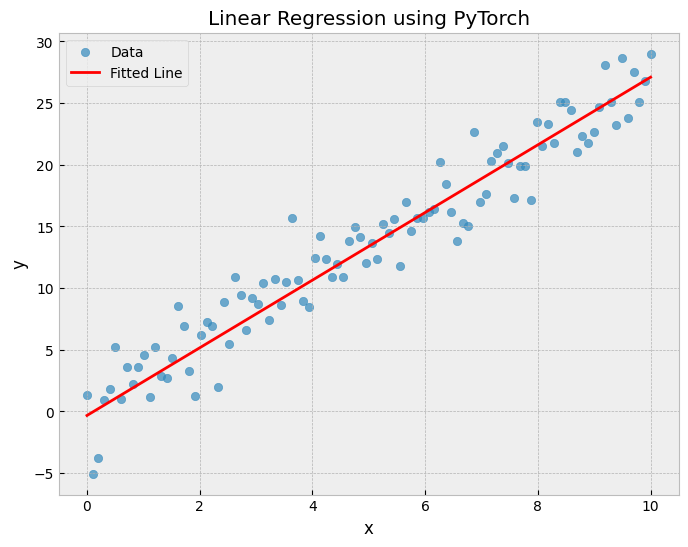

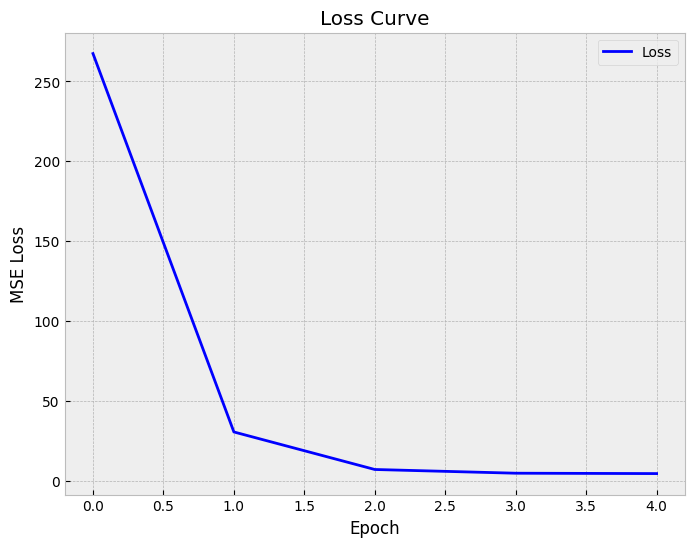

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
true_m = 2.5  # True slope
true_b = 1.0  # True intercept
x_data = torch.linspace(0, 10, 100).unsqueeze(1)  # 100 points in range [0, 10]
y_data = true_m * x_data + true_b + torch.randn_like(x_data) * 2.0  # Add noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Input and output are both 1D

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 5
losses = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Extract the learned parameters
learned_m = model.linear.weight.item()
learned_b = model.linear.bias.item()
print(f"Learned parameters: m = {learned_m:.4f}, b = {learned_b:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_data.numpy(), y_data.numpy(), label="Data", alpha=0.7)
plt.plot(x_data.numpy(), model(x_data).detach().numpy(), label="Fitted Line", color="red")
plt.title("Linear Regression using PyTorch")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), losses, label="Loss", color="blue")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()


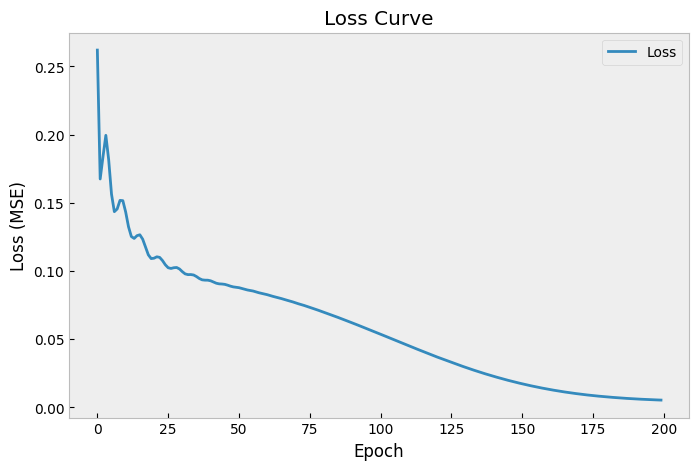

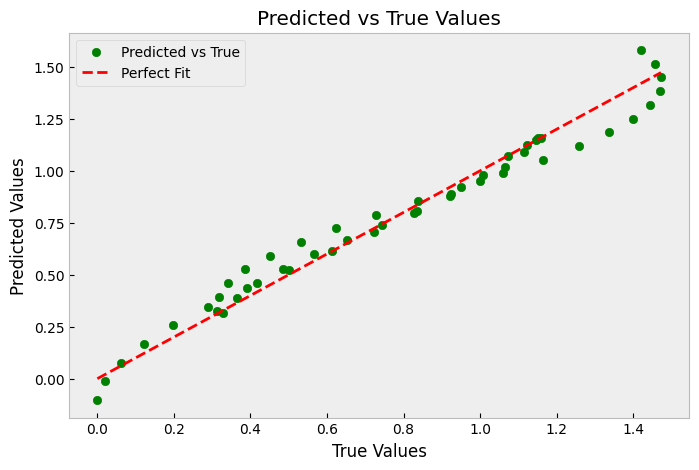

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate minimal synthetic data
num_samples = 50  # Small number of samples to reduce memory usage
x1_data = torch.linspace(0, 5, num_samples).unsqueeze(1)
x2_data = torch.linspace(0, 5, num_samples).unsqueeze(1)
y_data = torch.sin(x1_data) * torch.sin(x2_data) + 0.1 * x1_data

# Combine x1 and x2 into input pairs
x_data = torch.cat([x1_data, x2_data], dim=1)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 200  # Reduce epochs for minimal runtime
losses = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve")
plt.grid()
plt.legend()
plt.show()

# Predict and compare with ground truth
with torch.no_grad():
    predictions = model(x_data).squeeze()

plt.figure(figsize=(8, 5))
plt.scatter(y_data.numpy(), predictions.numpy(), label="Predicted vs True", color="green")
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.legend()
plt.grid()
plt.show()


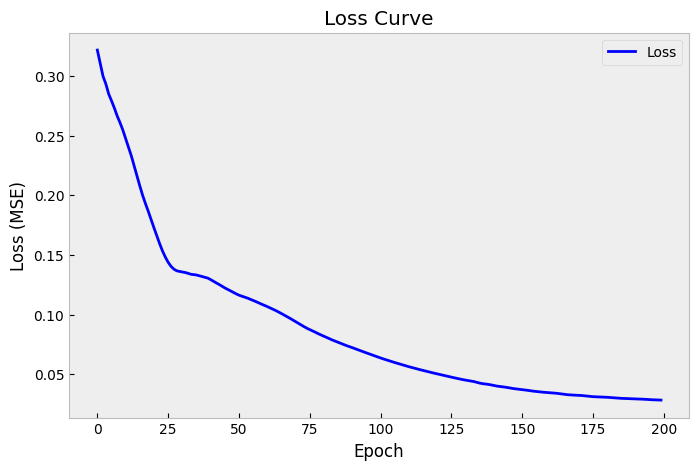

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
num_samples = 50  # Reduce number of samples to reduce memory usage
x1_data = torch.linspace(0, 5, num_samples).unsqueeze(1)
x2_data = torch.linspace(0, 5, num_samples).unsqueeze(1)
x1_grid, x2_grid = torch.meshgrid(x1_data.squeeze(), x2_data.squeeze(), indexing="ij")
y_data = torch.sin(x1_grid) * torch.sin(x2_grid) + 0.1 * x1_grid + torch.randn_like(x1_grid) * 0.1  # Ground truth with noise

# Flatten for training
x1_flat = x1_grid.flatten().unsqueeze(1)
x2_flat = x2_grid.flatten().unsqueeze(1)
x_data = torch.cat([x1_flat, x2_flat], dim=1)
y_data_flat = y_data.flatten().unsqueeze(1)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 200  # Reduce epochs for minimal runtime
losses = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data_flat)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Generate predictions for visualization
with torch.no_grad():
    y_pred_flat = model(x_data).squeeze()
    y_pred_grid = y_pred_flat.reshape(x1_grid.shape)
    mse_grid = ((y_pred_grid - y_data) ** 2).numpy()

'''
# Plot results
fig = plt.figure(figsize=(18, 5))

# Ground truth
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x1_grid.numpy(), x2_grid.numpy(), y_data.numpy(), cmap="viridis", alpha=0.9)
ax1.set_title("Ground Truth")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("y")

# Fitted surface
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x1_grid.numpy(), x2_grid.numpy(), y_pred_grid.numpy(), cmap="viridis", alpha=0.9)
ax2.set_title("Fitted Surface")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("y")

# MSE surface
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x1_grid.numpy(), x2_grid.numpy(), mse_grid, cmap="magma", alpha=0.9)
ax3.set_title("MSE")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.set_zlabel("Error")

plt.tight_layout()
plt.show()
'''

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), losses, label="Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve")
plt.grid()
plt.legend()
plt.show()

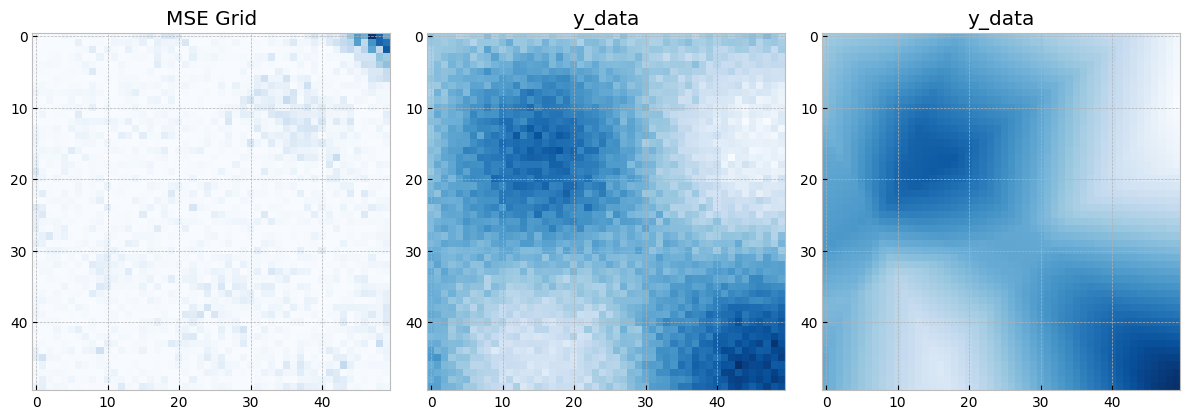

In [ ]:
# prompt: PLot side by side imshow plt.imshow(mse_grid)
# y_data.numpy().shape
# y_pred_grid.numpy().shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].imshow(mse_grid)
axes[0].set_title('MSE Grid')

axes[1].imshow(y_data.numpy())
axes[1].set_title('y_data')

axes[2].imshow(y_pred_grid.numpy())
axes[2].set_title('y_data')


plt.tight_layout()
plt.show()

# Mean functions

In [ ]:
import torch
import gpytorch

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

from tqdm.notebook import tqdm

## Zero Mean

In [ ]:
xs = torch.linspace(0, 10, 101).unsqueeze(1)

train_x = torch.tensor([[0.5], [1.0], [1.5], [3], [4]])
train_y = torch.tensor([0.0625, 0.25, 0.375, 2.25, 4])

def visualize_gp_belief(model, likelihood):
    with torch.no_grad():
        predictive_distribution = likelihood(model(xs))
        predictive_mean = predictive_distribution.mean
        predictive_upper, predictive_lower = predictive_distribution.confidence_region()

    plt.figure(figsize=(8, 6))

    plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

    plt.plot(xs, predictive_mean, label="mean")
    plt.fill_between(
        xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95% CI"
    )

    plt.legend(fontsize=15);

In [ ]:
class ConstantMeanGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

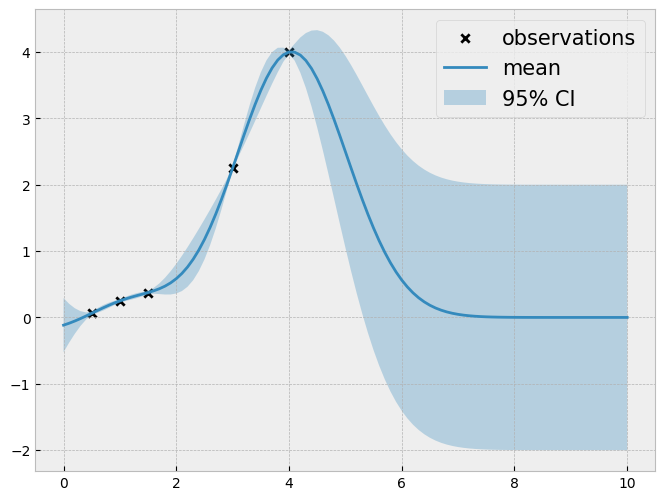

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ConstantMeanGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

## Constant mean

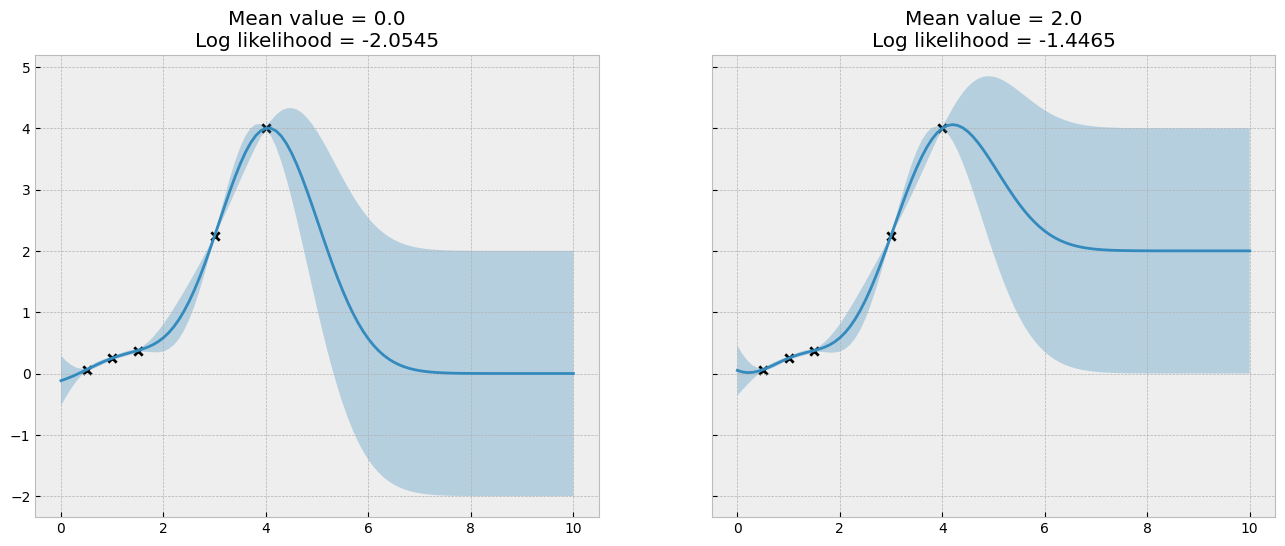

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# first panel
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_upper, predictive_lower = predictive_distribution.confidence_region()

ax[0].scatter(train_x, train_y, marker="x", c="k", label="observations")

ax[0].plot(xs, predictive_mean, label="mean")
ax[0].fill_between(
    xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95\% CI"
)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

with torch.no_grad():
    loss = -mll(model(train_x), train_y)

model.eval()
likelihood.eval()

ax[0].set_title(
    f"Mean value = {model.mean_module.constant.item():.1f}"
    + f"\nLog likelihood = {-loss.item():.4f}"
)

# second panel
model.mean_module.constant = 2  # torch.nn.Parameter(torch.tensor(2.0))

with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_upper, predictive_lower = predictive_distribution.confidence_region()

ax[1].scatter(train_x, train_y, marker="x", c="k", label="observations")

ax[1].plot(xs, predictive_mean, label="mean")
ax[1].fill_between(
    xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95\% CI"
)

model.train()
likelihood.train()

with torch.no_grad():
    loss = -mll(model(train_x), train_y)

model.eval()
likelihood.eval()

ax[1].set_title(
    f"Mean value = {model.mean_module.constant.item():.1f}"
    + f"\nLog likelihood = {-loss.item():.4f}"
)

plt.show()

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ConstantMeanGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

In [ ]:
# train the hyperparameter (the constant)
optimizer = torch.optim.Adam([model.mean_module.constant], lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
constants = []
for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    constants.append(model.mean_module.constant.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

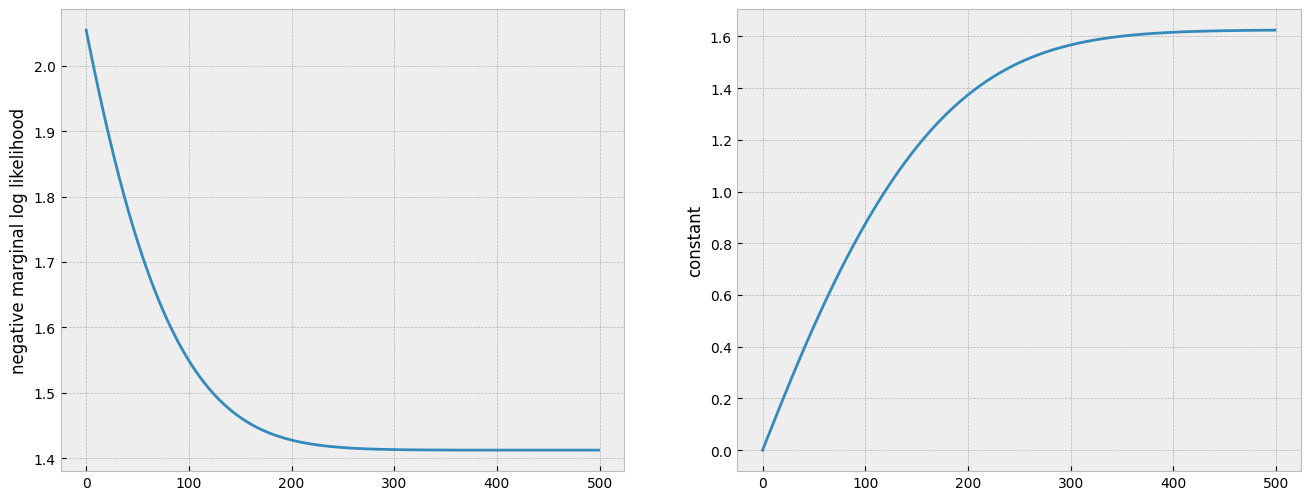

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(constants)
ax[1].set_ylabel("constant");

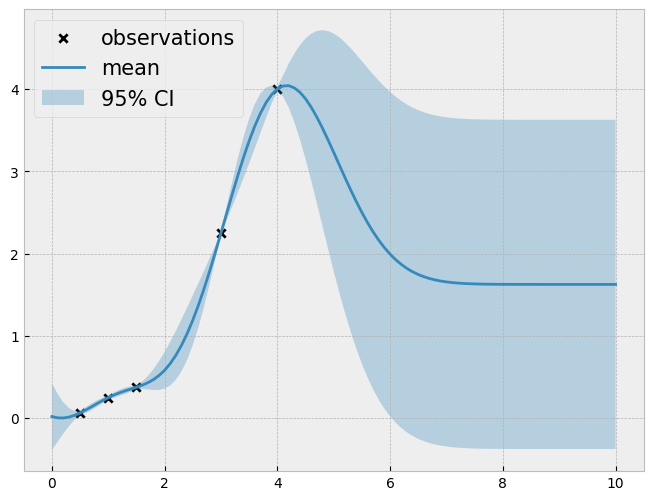

In [ ]:
visualize_gp_belief(model, likelihood)

## Linear mean

In [ ]:
class LinearMeanGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.LinearMean(1)
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = LinearMeanGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

In [ ]:
# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.mean_module.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
weights = []
biases = []
for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    weights.append(model.mean_module.weights.item())
    biases.append(model.mean_module.bias.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

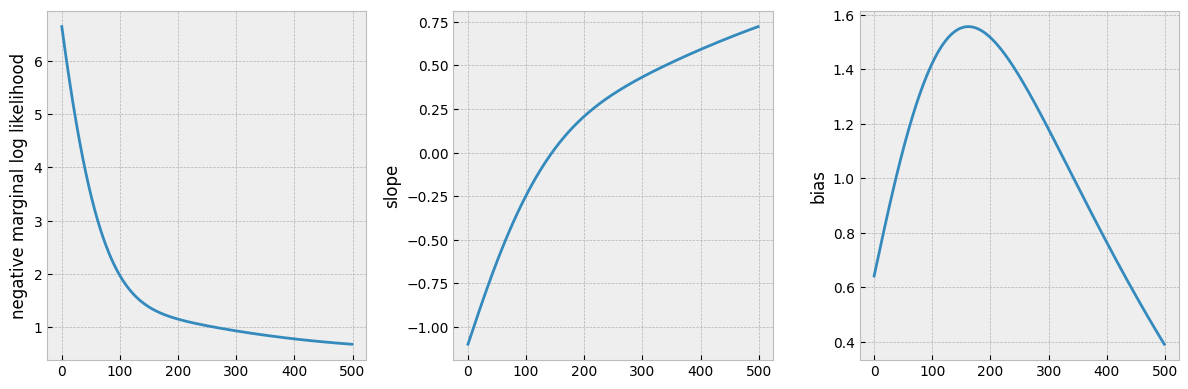

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(weights)
ax[1].set_ylabel("slope")

ax[2].plot(biases)
ax[2].set_ylabel("bias")

plt.tight_layout();

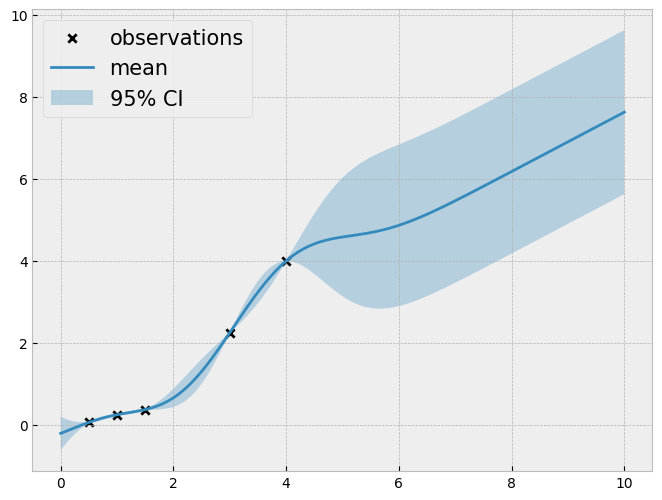

In [ ]:
visualize_gp_belief(model, likelihood)

## Quadratic mean

In [ ]:
class QuadraticMean(gpytorch.means.Mean):
    def __init__(self, batch_shape=torch.Size(), bias=True):
        super().__init__()
        self.register_parameter(
            name="second", parameter=torch.nn.Parameter(torch.randn(*batch_shape, 1, 1))
        )
        self.register_parameter(
            name="first", parameter=torch.nn.Parameter(torch.randn(*batch_shape, 1, 1))
        )

        if bias:
            self.register_parameter(
                name="bias", parameter=torch.nn.Parameter(torch.randn(*batch_shape, 1))
            )
        else:
            self.bias = None

    def forward(self, x):
        res = x.pow(2).matmul(self.second).squeeze(-1) + x.matmul(self.first).squeeze(
            -1
        )
        if self.bias is not None:
            res = res + self.bias
        return res


class QuadraticMeanGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = QuadraticMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = QuadraticMeanGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

In [ ]:
# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.mean_module.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
firsts = []
seconds = []
biases = []
for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    firsts.append(model.mean_module.first.item())
    seconds.append(model.mean_module.second.item())
    biases.append(model.mean_module.bias.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

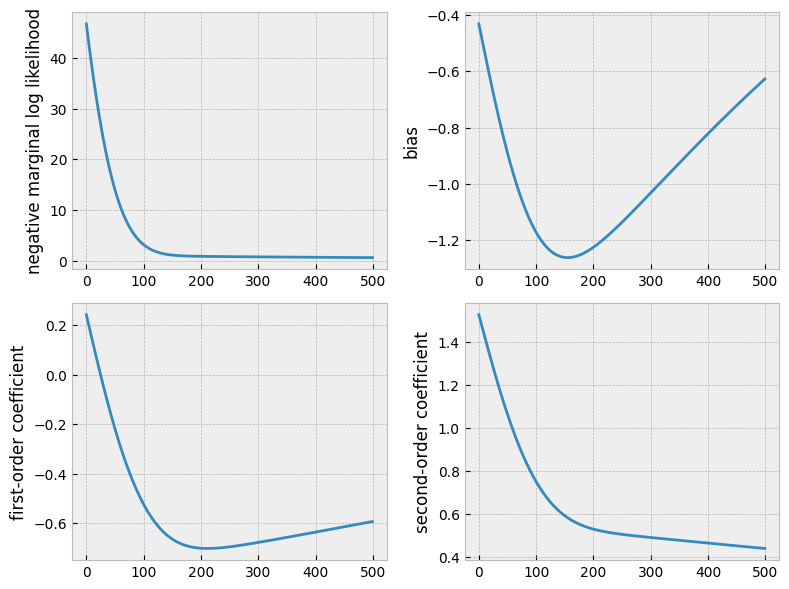

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0][0].plot(losses)
ax[0][0].set_ylabel("negative marginal log likelihood")

ax[0][1].plot(biases)
ax[0][1].set_ylabel("bias")

ax[1][0].plot(firsts)
ax[1][0].set_ylabel("first-order coefficient")

ax[1][1].plot(seconds)
ax[1][1].set_ylabel("second-order coefficient")

plt.tight_layout();

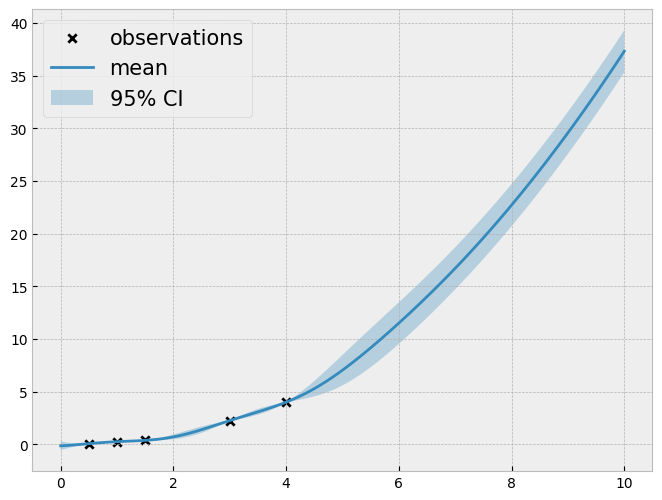

In [ ]:
visualize_gp_belief(model, likelihood)